In [3]:
import numpy as np
import sep

In [4]:
import matplotlib.pyplot as plt
from matplotlib import rcParams
from astropy.io import fits
%matplotlib inline

rcParams ['figure.figsize'] = [10.,8.]

Get the data from the file

In [42]:
data = fits.getdata("hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits")

Show the first image

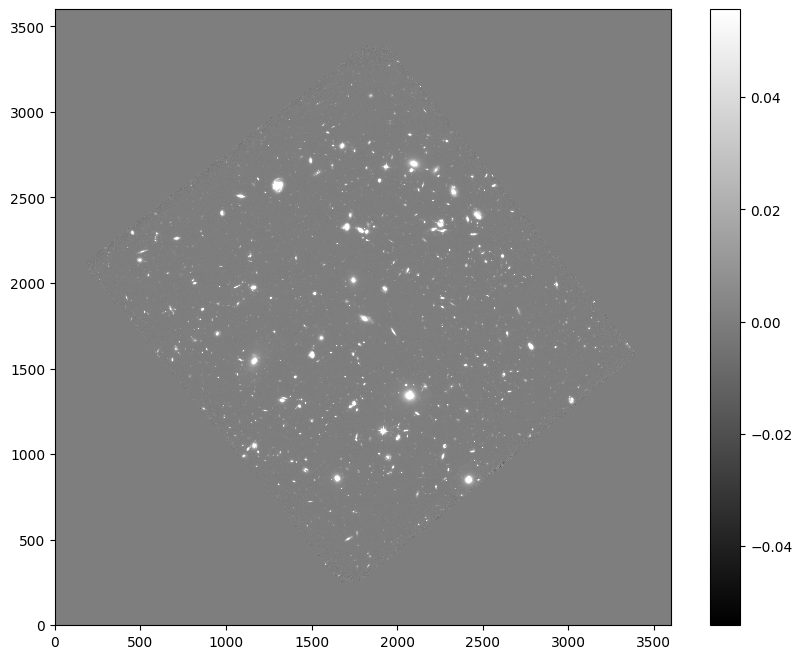

In [33]:
m, s = np.mean(data), np.std(data)
plt.imshow(data, interpolation='nearest', cmap='gray', vmin=m-s, vmax=m+s, origin='lower')
plt.colorbar();
plt.savefig('1final.png')

Measure a spatially varying background on the image

In [8]:
data = data.byteswap().newbyteorder()
bkg = sep.Background(data)

Get a "global" mean and noise of the image background:

In [34]:
print(bkg.globalback)
print(bkg.globalrms)

0.0
0.0005398219218477607


Evaluate background as 2d array, same size as original image

In [35]:
bkg_image = bkg.back()
bkg_image = np.array(bkg)

Show the background

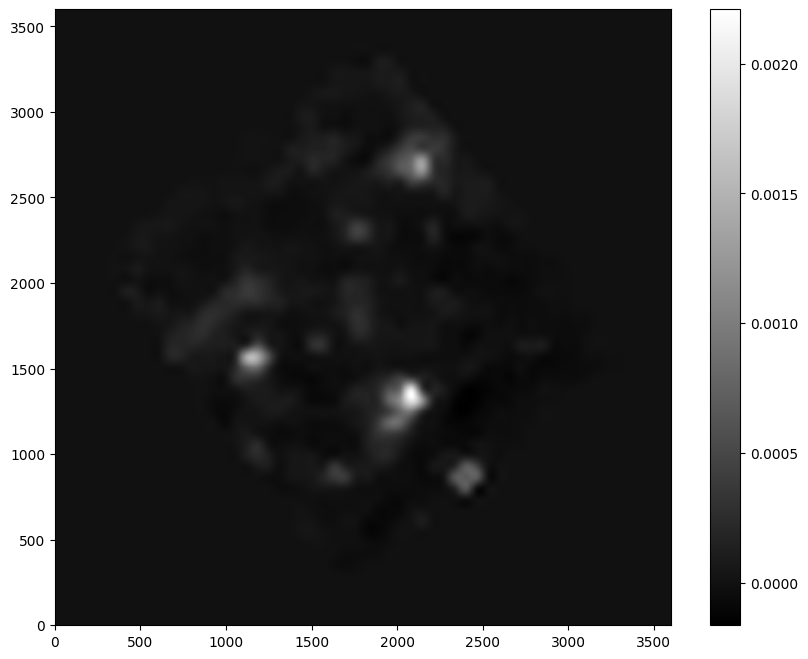

In [36]:
plt.imshow(bkg_image, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('2final.png')

Evaluate the background noise as 2-d array, same size as original image

In [47]:
bkg_rms = bkg.rms()

Show the background noise

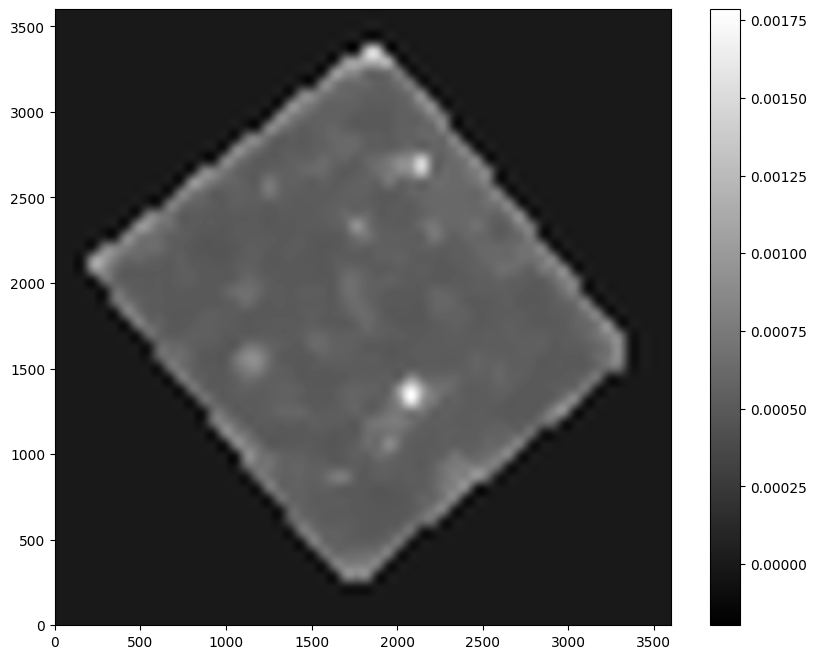

In [48]:
plt.imshow(bkg_rms, interpolation='nearest', cmap='gray', origin='lower')
plt.colorbar();
plt.savefig('3final.png')

Subtract the background

In [49]:
data_sub = data - bkg

In [50]:
objects = sep.extract(data_sub, 1.5, err=bkg.globalrms)

The number of objects that were detected

In [51]:
len(objects)

8643

Plot the background-subtracted image and an ellipse for each object

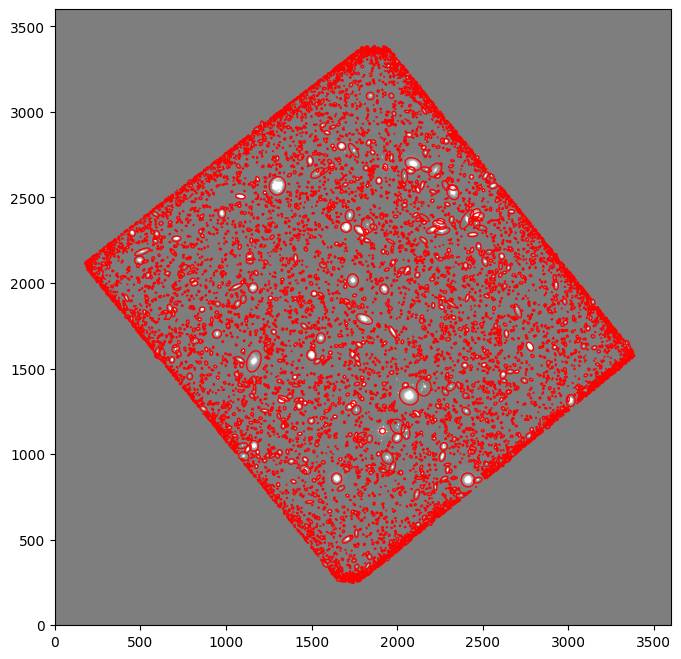

In [52]:
from matplotlib.patches import Ellipse

fig, ax = plt.subplots()
m, s = np.mean(data_sub), np.std(data_sub)
im = ax.imshow(data_sub, interpolation='nearest', cmap='gray',
               vmin=m-s, vmax=m+s, origin='lower')

for i in range(len(objects)):
    e = Ellipse(xy=(objects['x'][i], objects['y'][i]),
                width=6*objects['a'][i],
                height=6*objects['b'][i],
                angle=objects['theta'][i] * 180. / np.pi)
    e.set_facecolor('none')
    e.set_edgecolor('red')
    ax.add_artist(e)
plt.savefig('4final.png')

All available fields

In [53]:
objects.dtype.names

('thresh',
 'npix',
 'tnpix',
 'xmin',
 'xmax',
 'ymin',
 'ymax',
 'x',
 'y',
 'x2',
 'y2',
 'xy',
 'errx2',
 'erry2',
 'errxy',
 'a',
 'b',
 'theta',
 'cxx',
 'cyy',
 'cxy',
 'cflux',
 'flux',
 'cpeak',
 'peak',
 'xcpeak',
 'ycpeak',
 'xpeak',
 'ypeak',
 'flag')

In [54]:
flux, fluxerr, flag = sep.sum_circle(data_sub, objects['x'], objects['y'],
                                     3.0, err=bkg.globalrms, gain=1.0)


Show the first 10 objects results

In [55]:
for i in range(10):
    print("object {:d}: flux = {:f} +/- {:f}".format(i, flux[i], fluxerr[i]))

object 0: flux = 0.031282 +/- 0.176890
object 1: flux = 0.031018 +/- 0.176142
object 2: flux = -0.024388 +/- 0.002883
object 3: flux = 0.001947 +/- 0.044219
object 4: flux = 0.012457 +/- 0.111649
object 5: flux = -0.011228 +/- 0.002875
object 6: flux = 0.029368 +/- 0.171394
object 7: flux = -0.009126 +/- 0.002875
object 8: flux = 0.048023 +/- 0.219161
object 9: flux = 0.027840 +/- 0.166877


I found 8643 sources. Making an array of the fluxes, I can use numpy to find the mean, median, standard deviation of the distribution of fluxes, and the outlier.

/tmp/ipykernel_184570/1979208036.py:1: RuntimeWarning: invalid value encountered in log10
  m = -2.5*np.log10(flux)


Standard deviation of fluxes: 9.241925555851745
Mean of fluxes: 0.3617466258281149
Median of fluxes: 0.030954822942148894
Outlier of fluxes: 807.2972835731507


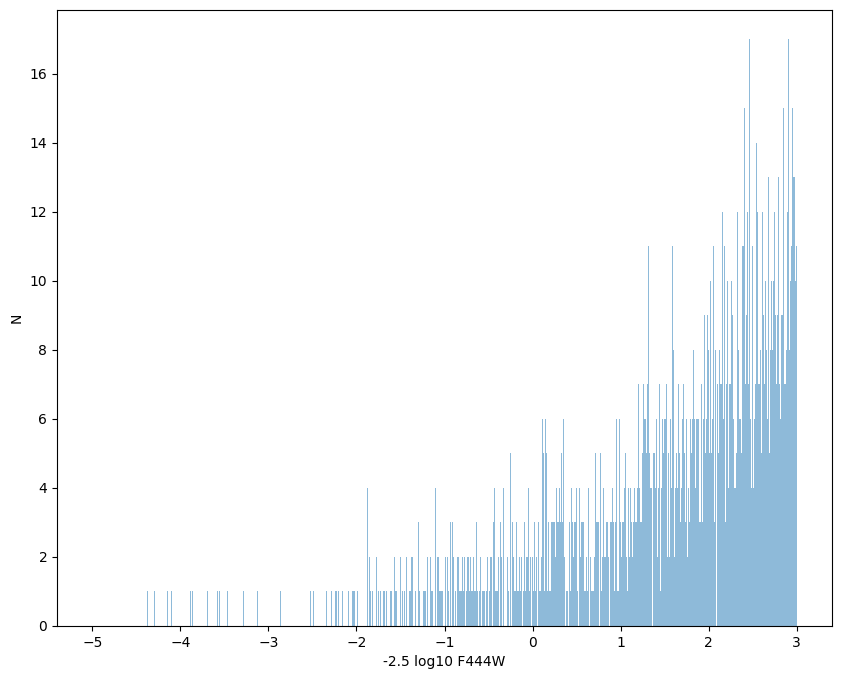

In [56]:
m = -2.5*np.log10(flux)
plt.hist(m, range=[-5,3],bins=1000,alpha=0.5) 
plt.xlabel('-2.5 log10 F444W') 
plt.ylabel('N')

print(f"Standard deviation of fluxes: {np.nanstd(flux)}") 
print(f"Mean of fluxes: {np.nanmean(flux)}") 
print(f"Median of fluxes: {np.nanmedian(flux)}") 
print(f"Outlier of fluxes: {np.nanmax(flux)}") 

Download the f125w and f160w images of the HUDF at the same website, and make a 3-color false image of the UDF using RGB -> f160w, f125w, f105w. Save the image as a PNG.

In [57]:
f125w = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f125w_v1.0_drz.fits')
f105w = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f105w_v1.0_drz.fits')
f160w = fits.getdata('hlsp_hudf12_hst_wfc3ir_udfmain_f160w_v1.0_drz.fits')

f125w = f125w.byteswap().newbyteorder() 
f105w = f105w.byteswap().newbyteorder() 
f160w = f160w.byteswap().newbyteorder() 

bkg_f125w = sep. Background(f125w) 
bkg_f105w = sep. Background(f105w) 
bkg_f160w = sep. Background(f160w) 

f125w -= bkg_f125w
f105w -= bkg_f105w 
f160w -= bkg_f160w

In [58]:
data = data.byteswap().newbyteorder()
flux_f125w, fluxerr_f125w, flag_f125w = sep.sum_circle(f125w, objects ['x'], objects ['y'], 
                                                       3.0, err=bkg.globalrms, gain=1.0) 

In [59]:
flux_f105w, fluxerr_f105w, flag_f105w = sep.sum_circle(f105w, objects ['x'], objects['y'], 
                                                       3.0, err=bkg.globalrms, gain=1.0)

In [60]:
objects = sep.extract(f160w,5,err=bkg_f160w.globalrms)
flux_f160w, fluxerr_f160w, flag_f160w = sep.sum_circle(f160w, objects ['x'], objects['y'], 
                                                       3.0, err=bkg_f160w.globalrms, gain=1.0) 

In [74]:
def rescale_data(data,dmin=0.0001,dmax=0.5): 
    datac = np.clip(data,dmin,dmax) 
    return (np.log10(datac)-np.log10(dmin))/(np.log10(dmax)-np.log10(dmin))
p_f125w = rescale_data(f125w)
p_f105w = rescale_data(f105w)
p_f160w = rescale_data(f160w)

In [75]:
# rgb = np.stack([p_f105w,0.7*p_f125w,p_f160w],axis=-1)
rgb = np.stack([p_f160w,0.7*p_f125w,p_f105w],axis=-1)
print(rgb.shape)

(3600, 3600, 3)


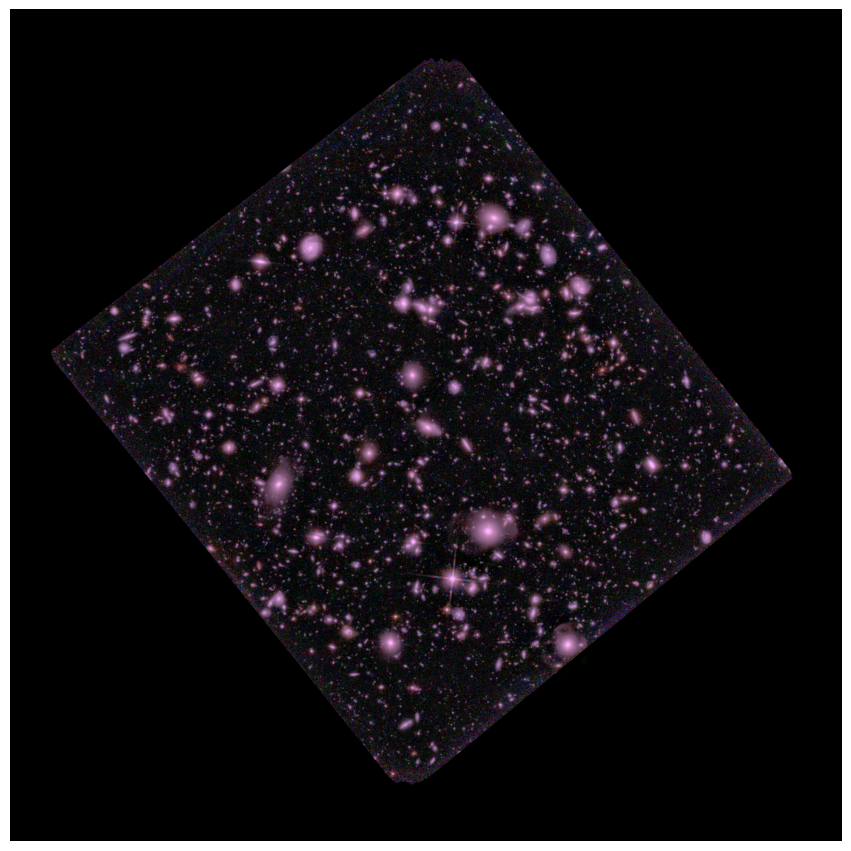

In [78]:
xsize = rgb.shape[1] 
ysize = rgb.shape[0] 

f,ax = plt.subplots (1,1,figsize=(3*xsize/1000,3*ysize/1000)) 
ax.axis('off') 
ax.imshow(rgb,origin='lower')
plt.imsave('finalplot.png', rgb, origin = 'lower')